In [4]:
import pandas as pd
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

filename    = "MABR_MIL_APR_UNADJ_RESULTS.txt"
data_frame  = pd.read_csv("csvs/"+filename,sep="|")


This piece of code returns the weekday by date formated with this pattern: %Y%m%d


In [14]:
from datetime import datetime
today = datetime.now().date()
_today = datetime.strftime(today,"%Y%m%d")
print today,_today
datetime.strptime(_today,"%Y%m%d").strftime("%A")

2018-05-25 20180525


'Friday'

Apply this translation to all records

In [16]:
data_frame['weekday'] =  data_frame.apply(lambda row: datetime.strptime(str(row.BKG_DATE),"%Y%m%d").strftime("%A"), axis=1)

Lets see the booking weekday distribution plotted in bar-chars.
Booking date tends to be in weekdays instead of weekend days

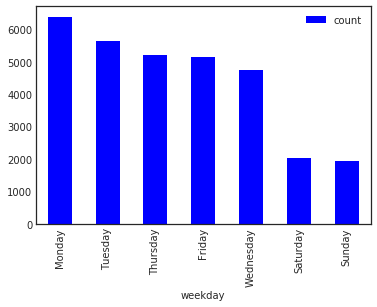

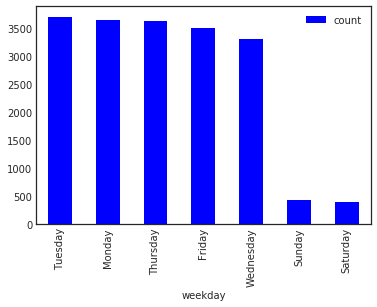

In [27]:
countries = [
    "US", #United States
    "DE", #Germany
]
for cc in countries:
    df = data_frame[data_frame.DEP_CTRY_CD==cc]
    df.groupby('weekday')['weekday'].count(
    ).reset_index(
        name='count'
    ).sort_values(
        ['count'], ascending=False
    ).plot(kind="bar",x="weekday")